***Lets Grow More***

**1)Begineer level task:
 Sub task 02)**


**Title:**            Stock market prediction and and forcasting using stacked LSTM


**Introduction:**

Trying to predict how the securities exchange will work is one of the most difficult tasks. There are so many variables involved with the expectation – physical elements versus psychological factors, rational and irrational behaviour, and so on.
All of these factors combine to make share costs unpredictable and difficult to predict with any degree of certainty.
Is it possible to use AI to our advantage in this space?AI approaches will potentially reveal examples and insights we hadn’t seen before, and these can be used to make unerringly exact expectations, using features like the most recent declarations of an organization, their quarterly income figures, and so on.
We will work with published information regarding a freely recorded organization’s stock costs in this report.
We’ll use a combination of AI calculations to forecast this company’s future stock price with LSTM.

**1)Importing all the libraries**


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
sns.set_style('whitegrid')

**2)Loading the dataset**

The dataset is taken from TATAGLOBAL company downloaded from(https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv). In this model I used the Stacked LSTM(Long Short Term Memory). A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

In [2]:
stocks=pd.read_csv('Stocks.csv')

In [3]:
df=stocks.copy()
df1=df.reset_index()['Close']

In [4]:
stocks.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,21-07-2010,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,22-07-2010,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,23-07-2010,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,26-07-2010,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,27-07-2010,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
stocks.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,24-09-2018,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,25-09-2018,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,26-09-2018,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,27-09-2018,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,28-09-2018,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Note:** According to dataset the stocks data ranges from 21/7/2010 to 28/9/2018

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Ckecking for any null values

In [7]:
stocks.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
stocks['Date']=pd.to_datetime(stocks['Date'])

In [9]:
stocks['Date'][0]

Timestamp('2010-07-21 00:00:00')

In [10]:
tech_list = stocks['Date'].unique()

In [11]:
stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

**3)Visualizing the data**

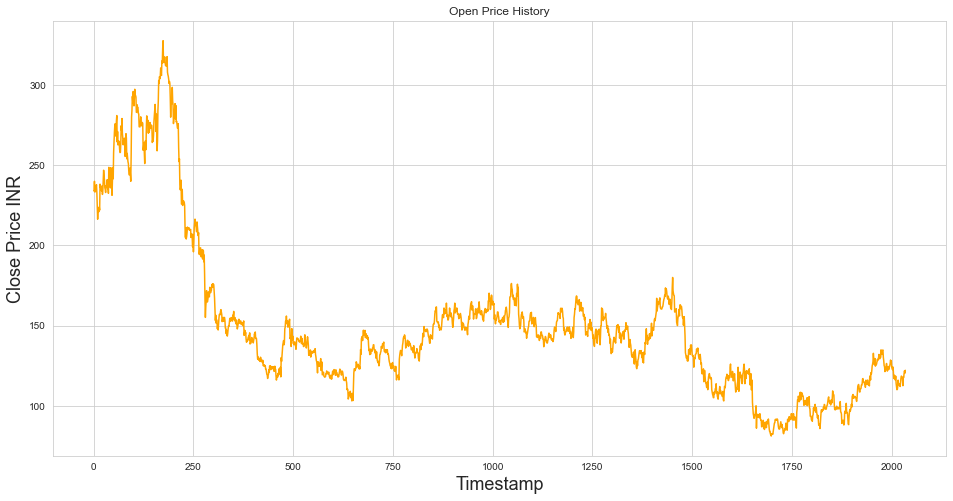

In [12]:
#opening vs time

plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(stocks['Open'], color='orange')
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

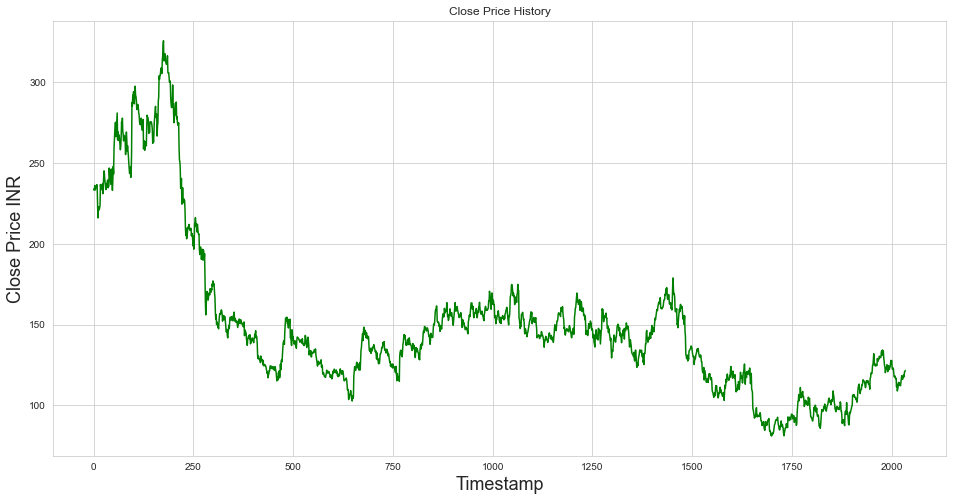

In [13]:
#closing vs time

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stocks['Close'], color='green')
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

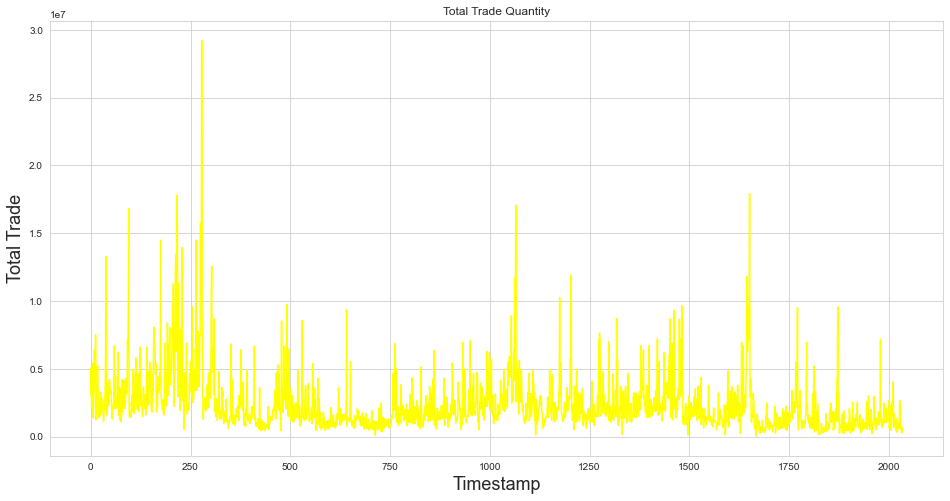

In [14]:
#total trade vs time

plt.figure(figsize=(16,8))
plt.title('Total Trade Quantity')
plt.plot(stocks['Total Trade Quantity'],color='yellow')
plt.xlabel('Timestamp',fontsize=18)
plt.ylabel('Total Trade',fontsize=18)
plt.show()

In [15]:
stocks["Date"].unique()

array(['2010-07-21T00:00:00.000000000', '2010-07-22T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', ...,
       '2018-09-26T00:00:00.000000000', '2018-09-27T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000'], dtype='datetime64[ns]')

**Percentage return**

In [16]:
stocks['1day % return']=((stocks['Close']-stocks['Open'])/stocks['Close'])*100
stocks.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),1day % return
0,2010-07-21,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,-0.128342
1,2010-07-22,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,-0.557342
2,2010-07-23,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,-2.454642
3,2010-07-26,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,1.185938
4,2010-07-27,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,-0.107158


<AxesSubplot:>

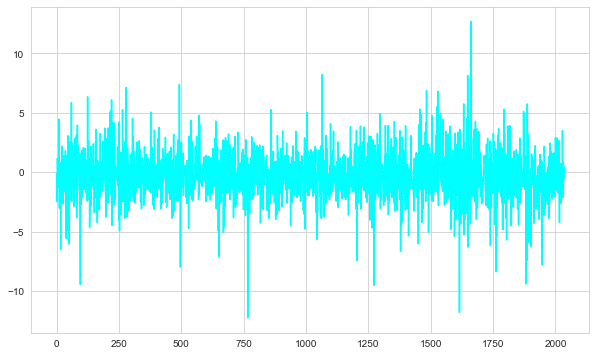

In [17]:
plt.figure(figsize=(10,6))
stocks['1day % return'].plot(color='cyan')

Between some interval

In [18]:
print(stocks['Date'])

0      2010-07-21
1      2010-07-22
2      2010-07-23
3      2010-07-26
4      2010-07-27
          ...    
2030   2018-09-24
2031   2018-09-25
2032   2018-09-26
2033   2018-09-27
2034   2018-09-28
Name: Date, Length: 2035, dtype: datetime64[ns]


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Turnover (Lacs)', ylabel='Density'>

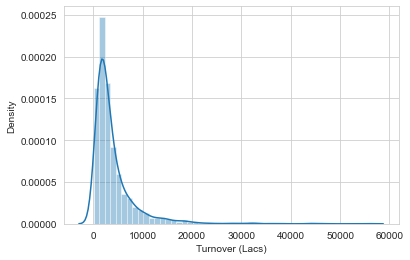

In [19]:
sns.distplot(stocks['Turnover (Lacs)'])

**Analysing monthly mean of close column**

It is a good practice to use copy of your dataset so that the changes we make while analysing won't alter the original data.

In [20]:
st2=stocks.copy()

In [21]:
st2['date']=pd.to_datetime(st2['Date'])

In [22]:
st2.set_index('Date',inplace=True)

In [23]:
st2.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),1day % return,date
Date,,,,,,,,,
2010-07-21,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,-0.128342,2010-07-21
2010-07-22,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,-0.557342,2010-07-22
2010-07-23,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,-2.454642,2010-07-23
2010-07-26,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,1.185938,2010-07-26
2010-07-27,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,-0.107158,2010-07-27


<AxesSubplot:xlabel='Date'>

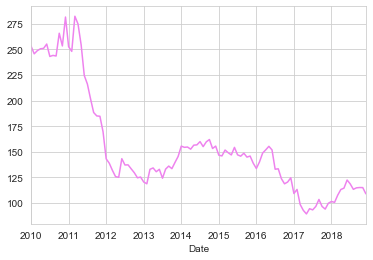

In [24]:
st2['Close'].resample('M').mean().plot(color='violet')

Resampling close column year wise

<AxesSubplot:xlabel='Date'>

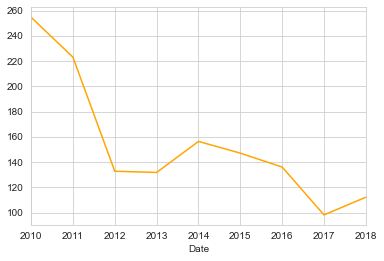

In [25]:
st2['Close'].resample('Y').mean().plot(color='orange')

In [26]:
st2.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),1day % return
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565,-0.219374
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877,2.041724
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000,-12.233348
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000,-1.395340
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000,-0.218069
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000,0.929457
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000,12.690355


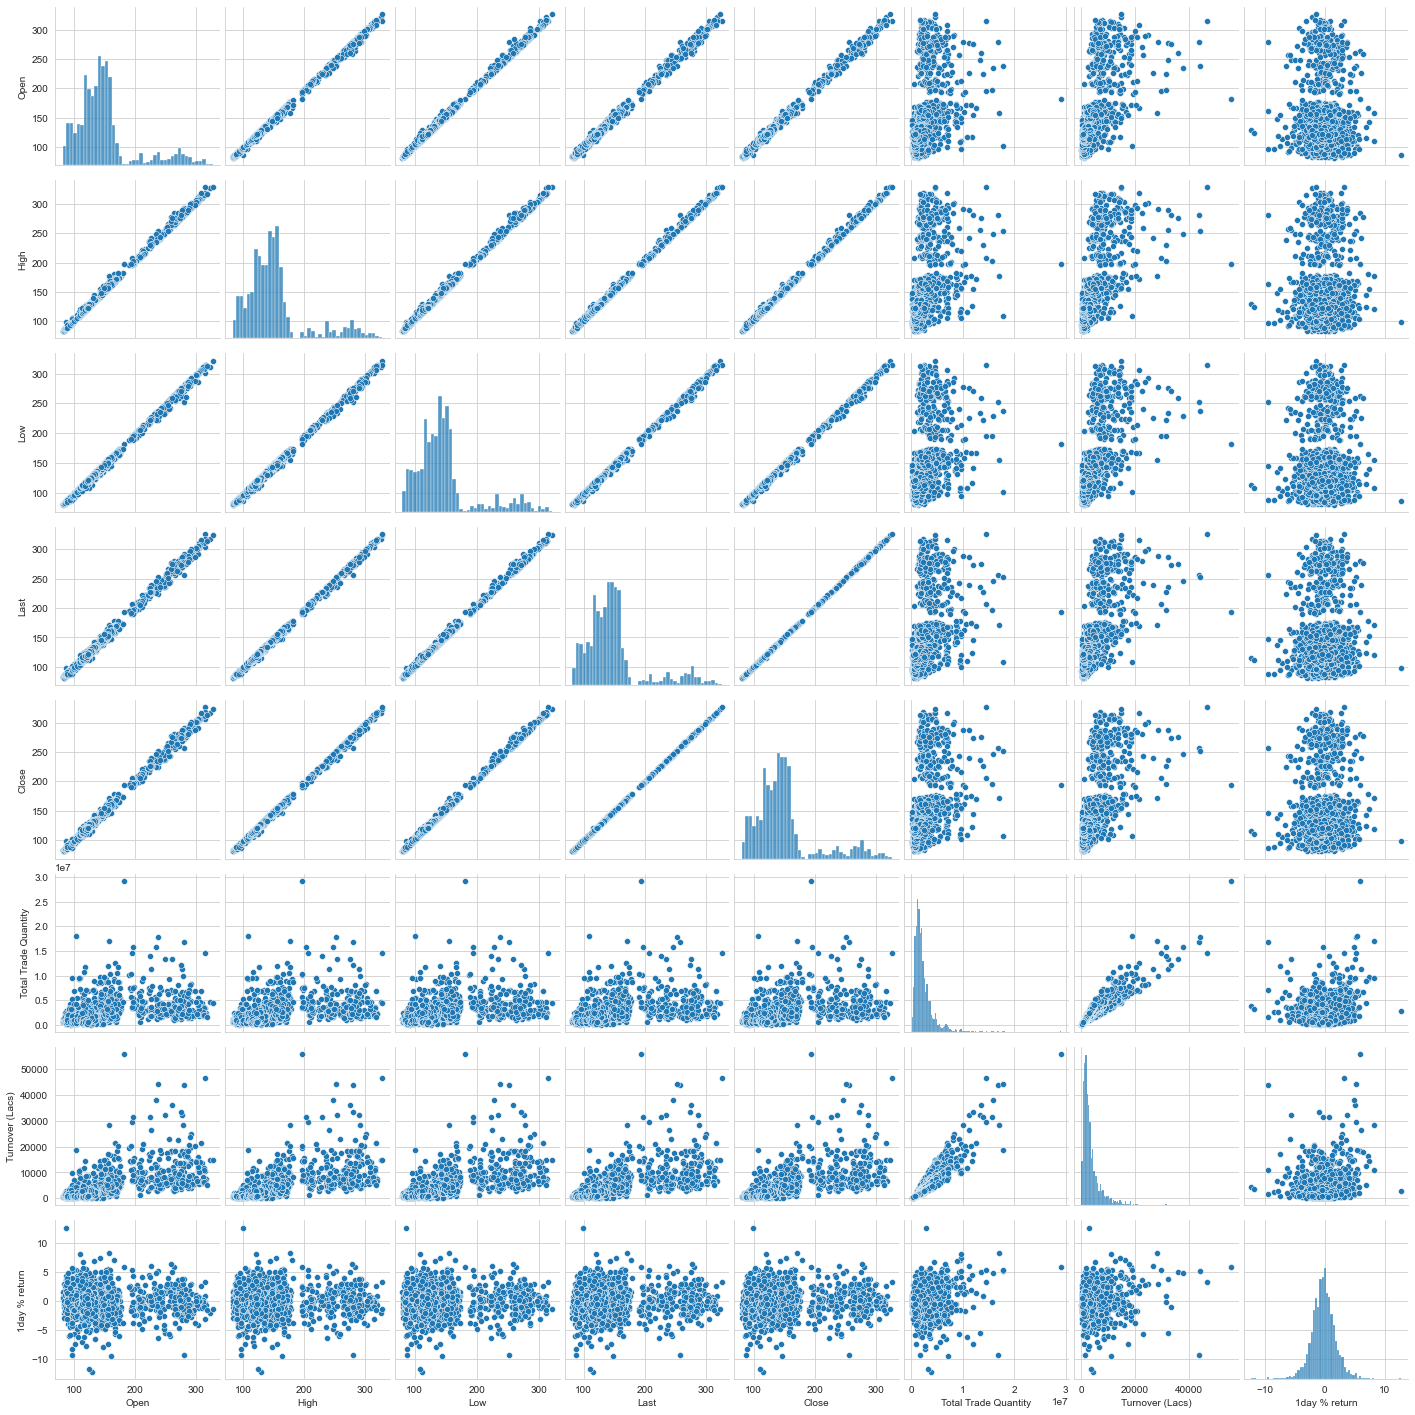

In [27]:

sns.pairplot(data=st2)

In [28]:
stocks['ms_change']=((stocks['Close']-stocks['Open'])/stocks['Close'])*100

In [29]:
stocks.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),1day % return,ms_change
0,2010-07-21,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,-0.128342,-0.128342
1,2010-07-22,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,-0.557342,-0.557342
2,2010-07-23,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,-2.454642,-2.454642
3,2010-07-26,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,1.185938,1.185938
4,2010-07-27,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,-0.107158,-0.107158


**Value at risk analysis**

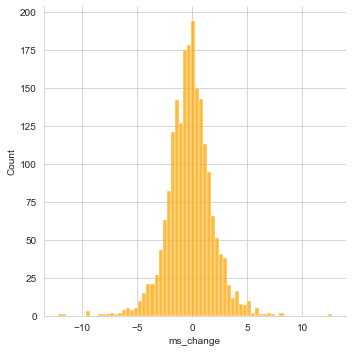

In [30]:
sns.displot(stocks['ms_change'],color='orange')

In [31]:
stocks['ms_change'].std()

2.041724422249354

In [32]:
stocks['ms_change'].quantile(0.1)

-2.475502526411576

In [33]:
stocks.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.100000,1.200250e+02,1.415000e+02,1.571750e+02,3.277000e+02
High,2035.0,1.519928e+02,4.941311e+01,82.800000,1.221000e+02,1.434000e+02,1.594000e+02,3.287500e+02
Low,2035.0,1.472939e+02,4.793196e+01,80.000000,1.183000e+02,1.396000e+02,1.551500e+02,3.216500e+02
Last,2035.0,1.494743e+02,4.873257e+01,81.000000,1.200750e+02,1.411000e+02,1.569250e+02,3.259500e+02
Close,2035.0,1.494503e+02,4.871204e+01,80.950000,1.200500e+02,1.412500e+02,1.569000e+02,3.257500e+02
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.000000,1.146444e+06,1.783456e+06,2.813594e+06,2.919102e+07
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.040000,1.427460e+03,2.512030e+03,4.539015e+03,5.575508e+04
1day % return,2035.0,-2.193743e-01,2.041724e+00,-12.233348,-1.395340e+00,-2.180685e-01,9.294568e-01,1.269036e+01
ms_change,2035.0,-2.193743e-01,2.041724e+00,-12.233348,-1.395340e+00,-2.180685e-01,9.294568e-01,1.269036e+01


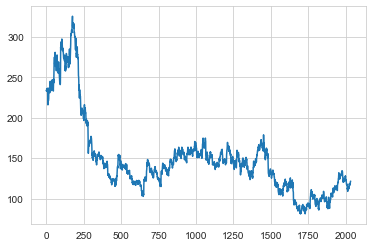

In [34]:
plt.plot(df1)

**4)Building LSTM model**

In [35]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [37]:
training_size,test_size

(1322, 713)

In [38]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [39]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [40]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [42]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
20/20 [==============================] - 19s 407ms/step - loss: 0.0242 - val_loss: 0.0064
Epoch 2/10
20/20 [==============================] - 5s 245ms/step - loss: 0.0030 - val_loss: 9.9808e-04
Epoch 3/10
20/20 [==============================] - 5s 224ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/10
20/20 [==============================] - 5s 237ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/10
20/20 [==============================] - 4s 213ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/10
20/20 [==============================] - 6s 317ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/10
20/20 [==============================] - 7s 361ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/10
20/20 [==============================] - 6s 313ms/step - loss: 0.0012 - val_loss: 8.9299e-04
Epoch 9/10
20/20 [==============================] - 7s 340ms/step - loss: 0.0012 - val_loss: 7.7911e-04
Epoch 10/10
20/20 [==============================] - 9s 459ms/step - loss: 0.0012 - val

**5)Prediction**

In [46]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

162.47096478288364

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

118.65456464528647

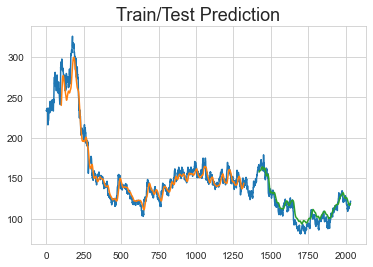

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.title('Train/Test Prediction',fontsize=18)
plt.show()